In [2]:
import pandas as pd
import numpy as np
import psycopg2
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

In [2]:
# !pip install sklearn

In [33]:
df_2019 = pd.read_csv('../../data/housing2019.csv', encoding='latin-1')


SyntaxError: EOL while scanning string literal (<ipython-input-33-3a206d262756>, line 1)

In [34]:
'''
add zeros to columns and populate new column Major_+_Minor
'''
df_2019['Major'] = df_2019['Major'].astype('str').str.zfill(6)
df_2019['Minor'] = df_2019['Minor'].astype('str').str.zfill(4)
df_2019['Major_+_Minor'] = df_2019['Major'] + df_2019['Minor']
df_2019.shape

(43545, 158)

In [5]:
def common_columns(a, b): 
    """
    this function takes in two pandas dfs and returns a list of columns that they have in common
    """
    
    a_set = set(a.columns) 
    b_set = set(b.columns) 
    if (a_set & b_set): 
        print(a_set & b_set) 
    else: 
        print("No common elements")

In [35]:
print(df_2019.shape)
for _ in df_2019.columns:
    print(_)

(43545, 158)
Unnamed: 0
Major_x
Minor_x
BldgNbr
NbrLivingUnits
Address
BuildingNumber
Fraction
DirectionPrefix
StreetName
StreetType
DirectionSuffix
ZipCode
Stories
BldgGrade
BldgGradeVar
SqFt1stFloor
SqFtHalfFloor
SqFt2ndFloor
SqFtUpperFloor
SqFtUnfinFull
SqFtUnfinHalf
SqFtTotLiving
SqFtTotBasement
SqFtFinBasement
FinBasementGrade
SqFtGarageBasement
SqFtGarageAttached
DaylightBasement
SqFtOpenPorch
SqFtEnclosedPorch
SqFtDeck
HeatSystem
HeatSource
BrickStone
ViewUtilization
Bedrooms
BathHalfCount
Bath3qtrCount
BathFullCount
FpSingleStory
FpMultiStory
FpFreestanding
FpAdditional
YrBuilt
YrRenovated
PcntComplete
Obsolescence
PcntNetCondition
Condition
AddnlCost
pin
ExciseTaxNbr
Major_y
Minor_y
DocumentDate
SalePrice
RecordingNbr
Volume
Page
PlatNbr
PlatType
PlatLot_x
PlatBlock_x
SellerName
BuyerName
PropertyType
PrincipalUse
SaleInstrument
AFForestLand
AFCurrentUseLand
AFNonProfitUse
AFHistoricProperty
SaleReason
PropertyClass
SaleWarning
Major
Minor
PropName
PlatName
PlatLot_y
PlatBlock

In [4]:
df_2019['WfntLocation'].value_counts()

NameError: name 'df_2019' is not defined

In [37]:
df_2019['Major_+_Minor']

0        0087000215
1        0088000177
2        0088000226
3        0084000171
4        0098000940
            ...    
43540    4039700280
43541    4040100170
43542    4040800180
43543    4046600310
43544    4053200260
Name: Major_+_Minor, Length: 43545, dtype: object

In [38]:
"""
selecting interested columns
"""
df_groom = df_2019[['Major_+_Minor', 'SalePrice', 'SqFtTotLiving', 'SqFtOpenPorch', 
                          'SqFtEnclosedPorch', 'SqFtDeck', 'TidelandShoreland',
                          'TrafficNoise', 'AirportNoise', 'PowerLines', 'Stories', 
                          'Condition', 'Area', 'TrafficNoise', 'AirportNoise', 'PowerLines', 
                          'OtherNuisances', 'WfntLocation', 'DocumentDate']]
# pd.DataFrame(groomed_df['Major_+_Minor'].value_counts()).iloc[100:]
# groomed_df[groomed_df['Major_+_Minor'] == '0415100049'].sort_values('DocumentDate', ascending=False)

In [39]:
"""
filtering data
"""

df_groom = df_groom[df_groom['SalePrice'] > 0]
df_groom = df_groom[df_groom['SalePrice'] < 5000000]
#df_groom = df_groom[df_groom['LivableSpace'] < 50000]
df_groom = df_groom[df_groom['SqFtTotLiving'] < 50000]
df_groom = df_groom[df_groom['DocumentDate'].str.contains('2019')]

In [10]:
df_groom['Area'].unique()

array([ 30.,  96.,  69.,  55.,  29.,  72.,  86.,  71.,  53.,  32.,  54.,
        44.,  42.,  27.,  59.,  38.,  39.,  26.,  58.,  84., 100.,  23.,
         1.,  16.,  82.,  25.,  28.,  66.,  15.,  17.,  24.,  52.,  51.,
         2.,  48.,  85.,  18.,  56.,  11.,  74.,  34.,  49.,  65.,  63.,
        45.,  21.,  47.,  37.,  95.,   6.,  94.,  61.,  14.,  19.,  41.,
        67.,  40.,  43.,   3.,  79.,  64.,  60.,  35.,  93.,   8.,  70.,
        57.,  80.,  22.,  87.,  92.,  36.,  81.,  68.,  62.,  13.,  88.,
        91.,  75.,  46.,  12.,  73.,  33.,   4.,   7.,  31.,  77.,  90.])

In [16]:
fsm = ols(formula='SalePrice ~ SqFtTotLiving', data=df_2019).fit()
b = fsm.params.Intercept
m = fsm.params.SqFtTotLiving
m, b

(224.63488759594452, 111191.12657206997)

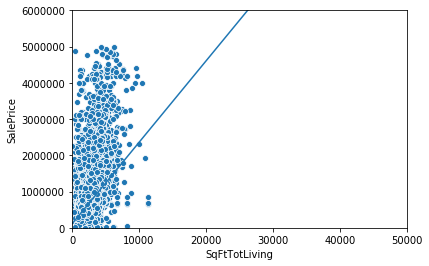

In [20]:
fig, ax = plt.subplots()

ax = sns.scatterplot(data=df_groom, x='SqFtTotLiving', y='SalePrice')
ax.set(ylim=(0, 6000000), xlim=(0, 50000))
# ax = sns.lineplot(x=df_2019['SqFtTotLiving'],y=(m*df_2019['SqFtTotLiving'] + b))
x = np.linspace(0,50000, 100)
y = m*x+b
ax = sns.lineplot(x,y)

In [54]:
df_2019['Township'].value_counts()

25    9178
24    9073
26    8061
23    6469
22    5441
21    4697
20     622
19       4
Name: Township, dtype: int64

In [ ]:
fsm = ols(formula='SalePrice ~ SqFtTotLiving', data=groomed_df).fit()

rainbow_statistic, rainbow_p_value = linear_rainbow(fsm)
print('p val: ', rainbow_p_value)
print('rainbow stat: ', rainbow_statistic)

In [49]:
fsm_multi = ols(formula='SalePrice ~ SqFtTotLiving + SqFtOpenPorch + SqFtDeck + TidelandShoreland + Condition + Stories + Area + WfntLocation', data=df_groom).fit()
fsm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     2249.
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:29:00   Log-Likelihood:            -4.2500e+05
No. Observations:               29636   AIC:                         8.500e+05
Df Residuals:                   29627   BIC:                         8.501e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          9.798e+04   1.71e+04      5.737      0.000    6.45e+04    1.31e+05
SqFtTotLiving       278.7808      2.879     96.828      0.000     273.138     284.424
SqFtOpenPorch       194.8438     18.313     10.640      0.000     158.950     230.737
SqFtDeck            178.4583     11.754     15.182      0.000     155.419     201.497
TidelandShoreland  3.135e+05   1.58e+04     19.886      0.000    2.83e+05    3.44e+05
Condition          1.688e+04   3754.694      4.495      0.000    9516.476    2.42e+04
Stories              4.8e+04   4925.180      9.746      0.000    3.83e+04    5.77e+04
Area              -2023.1239     89.220    -22.676      0.000   -2197.998   -1848.250
WfntLocation       2.341e+04   2673.280      8.756      0.000    1.82e+04    2.86e+04
==============================================================================
Omnibus:                    14583.552   Durbin-Watson:                   1.611
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           225393.761
Skew:                           1.988   Prob(JB):                         0.00
Kurtosis:                      15.912   Cond. No.                     1.77e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#  y = 281.85*x1 + 178.87*x2 + 195.04*x3 + 356274.87*x4 + 126523.45

In [55]:
# fsm_multi.params
b = fsm_multi.params.Intercept
m = fsm_multi.params.SqFtTotLiving
m, b

(278.7808046424248, 97975.20797469976)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

ax = sns.scatterplot(x='SqFtTotLiving', y='SalePrice', data=groomed_df)
x = np.linspace(0,50000)
ax = plt.plot(x, (m*x + b))

In [ ]:
mlr = LinearRegression()
mlr.fit(groomed_df[['SqFtTotLiving', 'SqFtOpenPorch', 'SqFtDeck', 'TidelandShoreland']], groomed_df['SalePrice'])

In [ ]:
print(mlr.intercept_)
print(mlr.coef_)

In [23]:
df = groomed_df
a_surf, b_surf, c_surf, d_surf = np.meshgrid(np.linspace(df.SqFtTotLiving.min(), df.SqFtTotLiving.max(),100),
                                            np.linspace(df.SqFtOpenPorch.min(), df.SqFtOpenPorch.max(),100), 
                                            np.linspace(df.SqFtDeck.min(), df.SqFtDeck.max(),100), 
                                            np.linspace(df.TidelandShoreland.min(), df.TidelandShoreland.max(),100))

In [45]:
only_x = pd.DataFrame({'SqFtTotLiving': a_surf.ravel(),
                     'SqFtOpenPorch': b_surf.ravel(),
                     'SqFtDeck': c_surf.ravel(),
                     'TidelandShoreland': d_surf.ravel()})


In [46]:
fitted_y = fsm_multi.predict(exog=only_x)
fitted_y = np.array(fitted_y)

In [ ]:
correlated_cols = [
    'SalePrice',
    'SqFtTotLiving',
    'TidelandShoreland',
    'SqFtOpenPorch',
    'SqFtDeck'
]
correlated_df = groomed_df[correlated_cols]
sns.pairplot(correlated_df)